In [12]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import kaleido
import plotly.graph_objects as go

In [67]:
# read the data
cmc = pd.read_excel('input/CheckM12_comparison.xlsx')
# Calculate Bscore
cmc['Bscore_CheckM1'] = cmc['Completeness_CheckM1']- cmc['Contamination_CheckM1']
cmc['Bscore_CheckM2'] = cmc['Completeness_CheckM2']- cmc['Contamination_CheckM2']

# one row per organism
cmc.head(2)

,NCBI_accession,domain,phylum,class,order,family,genus,species,Completeness_CheckM2,Contamination_CheckM2,Algorithm_CheckM2,Table_CheckM2,Completeness_CheckM1,Contamination_CheckM1,Level,Marker_lineage_CheckM1,Level_CheckM1,Bscore_CheckM1,Bscore_CheckM2
0,GCF_902807005,Bacteria,Chlamydiota,Chlamydiia,Chlamydiales,Chlamydiaceae,Chlamydiifrater,Chlamydiifrater phoenicopteri,96.15,0.15,Neural Network (Specific Model),11,95.27,0.0,1_k,Bacteria,k,95.27,96.00
1,GCF_902806995,Bacteria,Chlamydiota,Chlamydiia,Chlamydiales,Chlamydiaceae,Chlamydiifrater,Chlamydiifrater volucris,95.88,0.22,Neural Network (Specific Model),11,95.27,0.0,1_k,Bacteria,k,95.27,95.66


In [76]:
len(cmc)

715

In [68]:
print('CheckM1:')
print(cmc['Completeness_CheckM1'].mean())
print(cmc['Completeness_CheckM1'].std())
print('\n')
print('CheckM2:')
print(cmc['Completeness_CheckM2'].mean())
print(cmc['Completeness_CheckM2'].std())

CheckM1:
98.24506293706298
5.173377940645898


CheckM2:
99.39903496503506
2.009599941417705


In [69]:
print('CheckM1:')
print(len(cmc[cmc['Completeness_CheckM1'] <= 90]))
print('\n')
print('CheckM2:')
print(len(cmc[cmc['Completeness_CheckM2'] <= 90]))

CheckM1:
19


CheckM2:
2


In [77]:
len(cmc['phylum'].unique())

33

In [71]:
# two rows per organism
melt = pd.melt(cmc, id_vars=['NCBI_accession','phylum','class','order','family','genus','Algorithm_CheckM2',
                      'Table_CheckM2','Marker_lineage_CheckM1','Level_CheckM1'], 
        value_vars=['Completeness_CheckM1', 'Completeness_CheckM2'], ignore_index=False)

melt1 = pd.melt(cmc, id_vars=['NCBI_accession','phylum','class','order','family','genus','Algorithm_CheckM2',
                      'Table_CheckM2','Marker_lineage_CheckM1','Level_CheckM1'], 
        value_vars=['Contamination_CheckM1', 'Contamination_CheckM2'], ignore_index=False)



melt1.head(2)

,NCBI_accession,phylum,class,order,family,genus,Algorithm_CheckM2,Table_CheckM2,Marker_lineage_CheckM1,Level_CheckM1,variable,value
0,GCF_902807005,Chlamydiota,Chlamydiia,Chlamydiales,Chlamydiaceae,Chlamydiifrater,Neural Network (Specific Model),11,Bacteria,k,Contamination_CheckM1,0.0
1,GCF_902806995,Chlamydiota,Chlamydiia,Chlamydiales,Chlamydiaceae,Chlamydiifrater,Neural Network (Specific Model),11,Bacteria,k,Contamination_CheckM1,0.0


In [72]:
c1 = cmc[cmc['Completeness_CheckM1'] < 80]
n = c1['phylum']

c2 = melt.loc[melt['phylum'].isin(n)]
c2.head()

,NCBI_accession,phylum,class,order,family,genus,Algorithm_CheckM2,Table_CheckM2,Marker_lineage_CheckM1,Level_CheckM1,variable,value
2,GCF_902387545,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Phocaeicola,Neural Network (Specific Model),11,Bacteroidales,k,Completeness_CheckM1,99.25
3,GCF_902381765,Actinobacteriota,Actinomycetia,Mycobacteriales,Mycobacteriaceae,Corynebacterium,Neural Network (Specific Model),11,Actinomycetales,k,Completeness_CheckM1,99.34
6,GCF_900683625,Bacteroidota,Bacteroidia,Flavobacteriales,Weeksellaceae,Chryseobacterium,Neural Network (Specific Model),11,Flavobacteriales,k,Completeness_CheckM1,100.00
7,GCF_900660755,Firmicutes,Bacilli,Acholeplasmatales,Acholeplasmataceae,Acholeplasma,Neural Network (Specific Model),11,Bacteria,k,Completeness_CheckM1,97.97
8,GCF_900660745,Firmicutes,Bacilli,Acholeplasmatales,Acholeplasmataceae,Acholeplasma_A,Neural Network (Specific Model),11,Bacteria,k,Completeness_CheckM1,99.33


In [51]:
Actinoalloteichus = melt[melt['genus'] == 'Actinoalloteichus']


(20.0, 105.0)

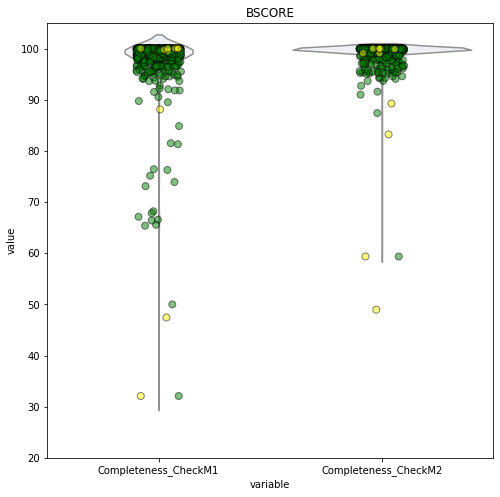

In [73]:
# Compare only Bscore
fig = plt.figure(figsize = (8, 8))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='BSCORE')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, color='green')

#sns.stripplot(data=Actinoalloteichus, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
 #               linewidth=1, color='yellow')

plt.ylim(20,105)

#fig.savefig('CM-comp/1Bin_score_Table_CheckM2_mrg.jpg', dpi=150)

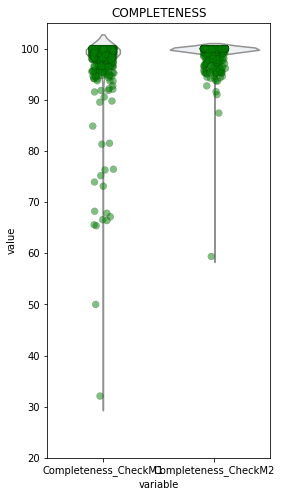

In [74]:
fig = plt.figure(figsize = (4, 8))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='COMPLETENESS')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=0.2, color='green')

plt.ylim(20,105)
fig.savefig('CM-comp/Completeness.svg', dpi=150,format='svg')

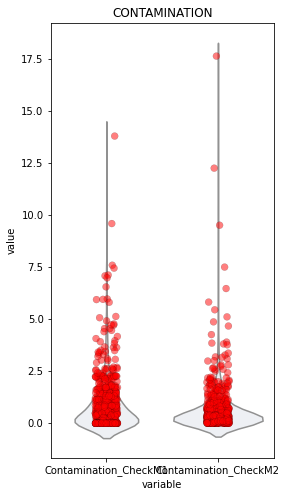

In [75]:
fig = plt.figure(figsize = (4, 8))

sns.violinplot(data=melt1, y='value', x='variable', color='#edf0f5').set(title='CONTAMINATION')
sns.stripplot(data=melt1, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=0.2, color='red')

#plt.ylim(20,105)
fig.savefig('CM-comp/Contamination.svg', dpi=150,format='svg')

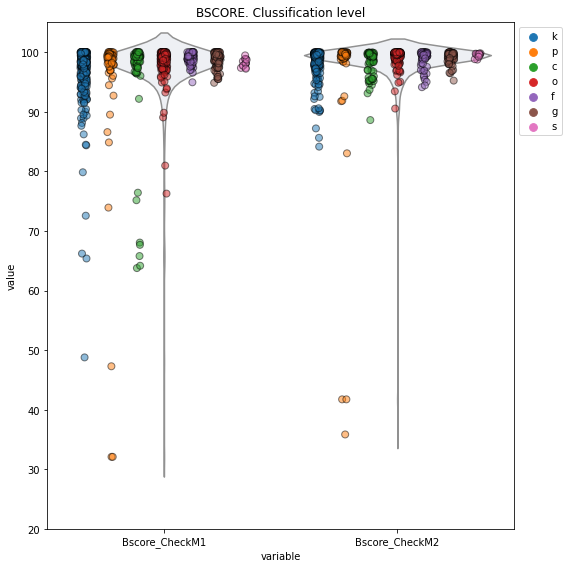

In [12]:
# Compare Bscore within level of clussification
fig = plt.figure(figsize = (8, 8))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='BSCORE. Clussification level')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, hue='Level_CheckM1', dodge=True)
plt.ylim(20,105)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.tight_layout()

fig.savefig('CM-comp/2Bin_score_Level_CheckM1.jpg', dpi=150)

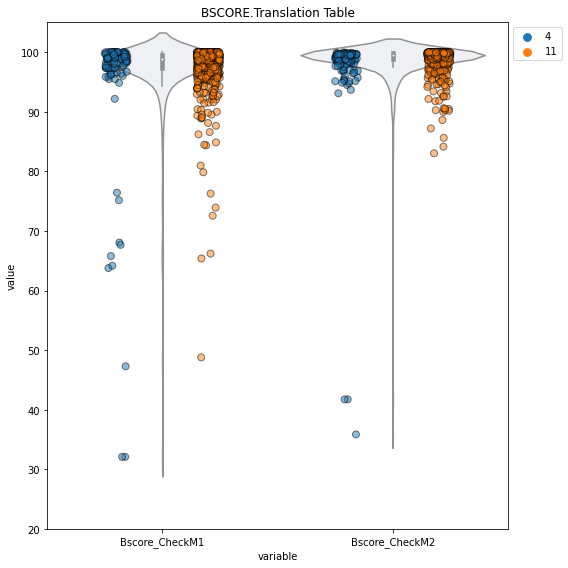

In [13]:
# Compare Bscore within Table CheckM2
fig = plt.figure(figsize = (8, 8))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='BSCORE.Translation Table')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, hue='Table_CheckM2', dodge=True)
plt.ylim(20,105)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.tight_layout()

fig.savefig('CM-comp/3Bin_score_Table_CheckM2.jpg', dpi=150)

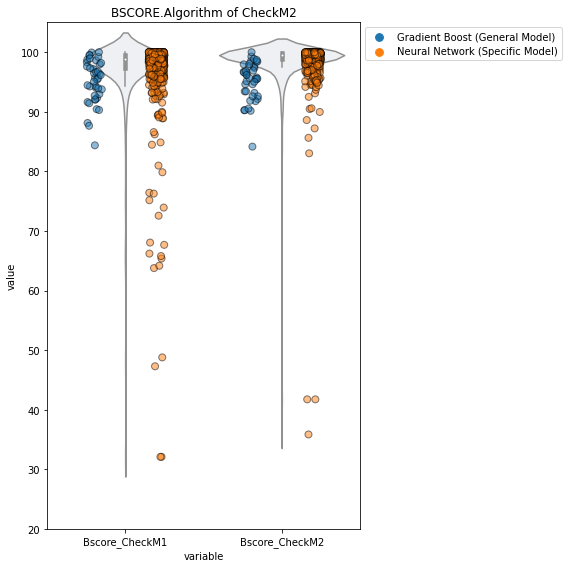

In [14]:
# Compare Bscore within Algorithm of CheckM2
fig = plt.figure(figsize = (8, 8))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='BSCORE.Algorithm of CheckM2')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, hue='Algorithm_CheckM2', dodge=True)
plt.ylim(20,105)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.tight_layout()

fig.savefig('CM-comp/3Bin_score_Algorithm_CheckM2.jpg', dpi=150)

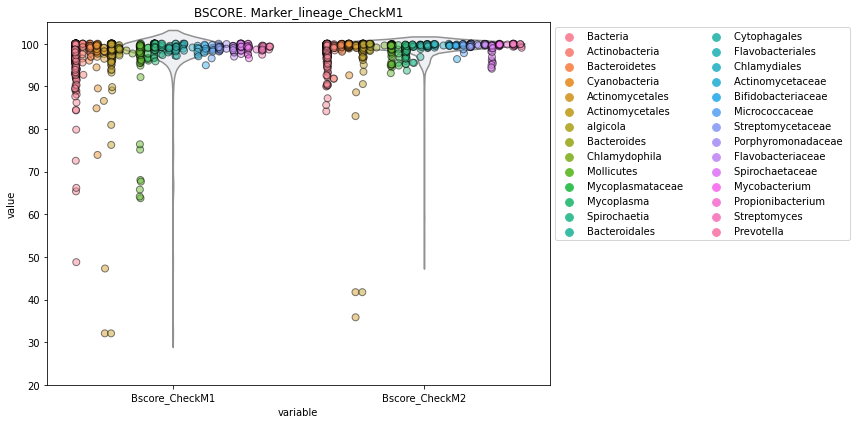

In [34]:
# Compare Bscore within CheckM1 finded lineage
fig = plt.figure(figsize = (12, 6))

sns.violinplot(data=melt1, y='value', x='variable', color='#edf0f5').set(title='BSCORE. Marker_lineage_CheckM1')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, hue='Marker_lineage_CheckM1', dodge=True)
plt.ylim(20,105)
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=2)
plt.tight_layout()

fig.savefig('CM-comp/Bin_score_Marker_lineage_CheckM1_2.jpg', dpi=150)

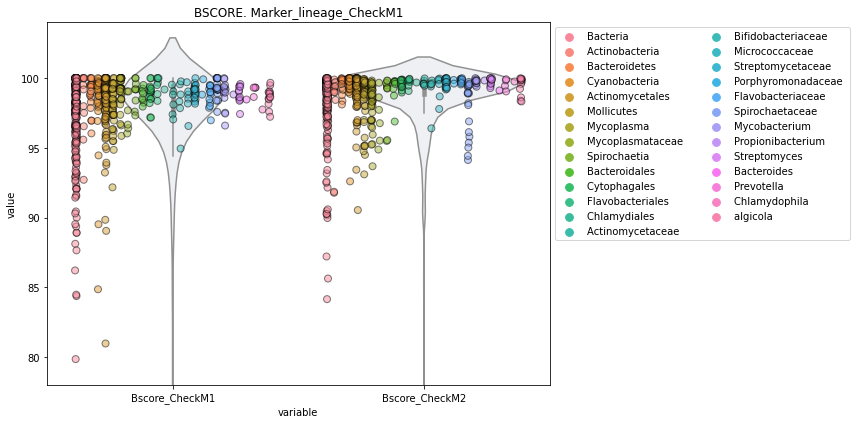

In [25]:
# Compare Bscore within CheckM1 finded lineage. Scale
fig = plt.figure(figsize = (12, 6))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='BSCORE. Marker_lineage_CheckM1')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, hue='Marker_lineage_CheckM1', dodge=True)
plt.ylim(78,104)
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=2)
plt.tight_layout()

fig.savefig('CM-comp/Bin_score_Marker_lineage_CheckM1_cut.jpg', dpi=150)

In [56]:
# Color by Real taxonomy!

In [16]:
# make nice names
cmc['phylum'] = cmc['phylum'].str.replace(r'p__', '')
cmc['class'] = cmc['class'].str.replace(r'c__', '')
cmc['order'] = cmc['order'].str.replace(r'o__', '')
cmc['family'] = cmc['family'].str.replace(r'f__', '')
cmc['genus'] = cmc['genus'].str.replace(r'g__', '')

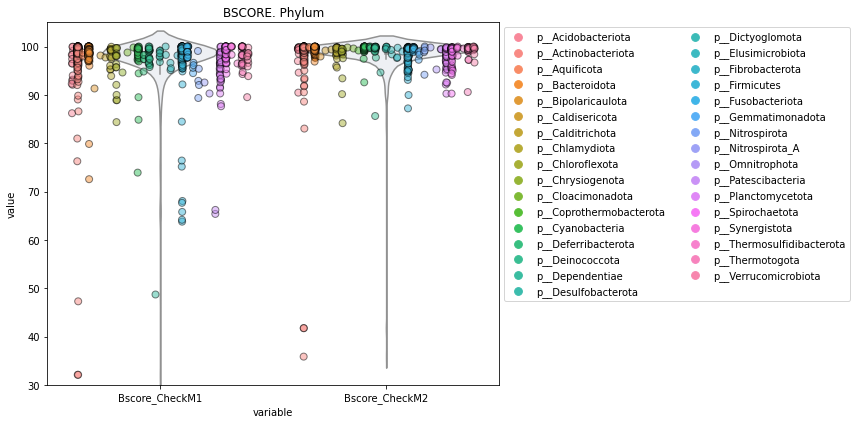

In [32]:
# Compare Bscore within real phylum of genomes
fig = plt.figure(figsize = (12, 6))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='BSCORE. Phylum')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, hue='phylum', dodge=True)



plt.ylim(30,105)
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=2)
plt.tight_layout()

fig.savefig('CM-comp/4Bin_score_phylum.jpg', dpi=150)

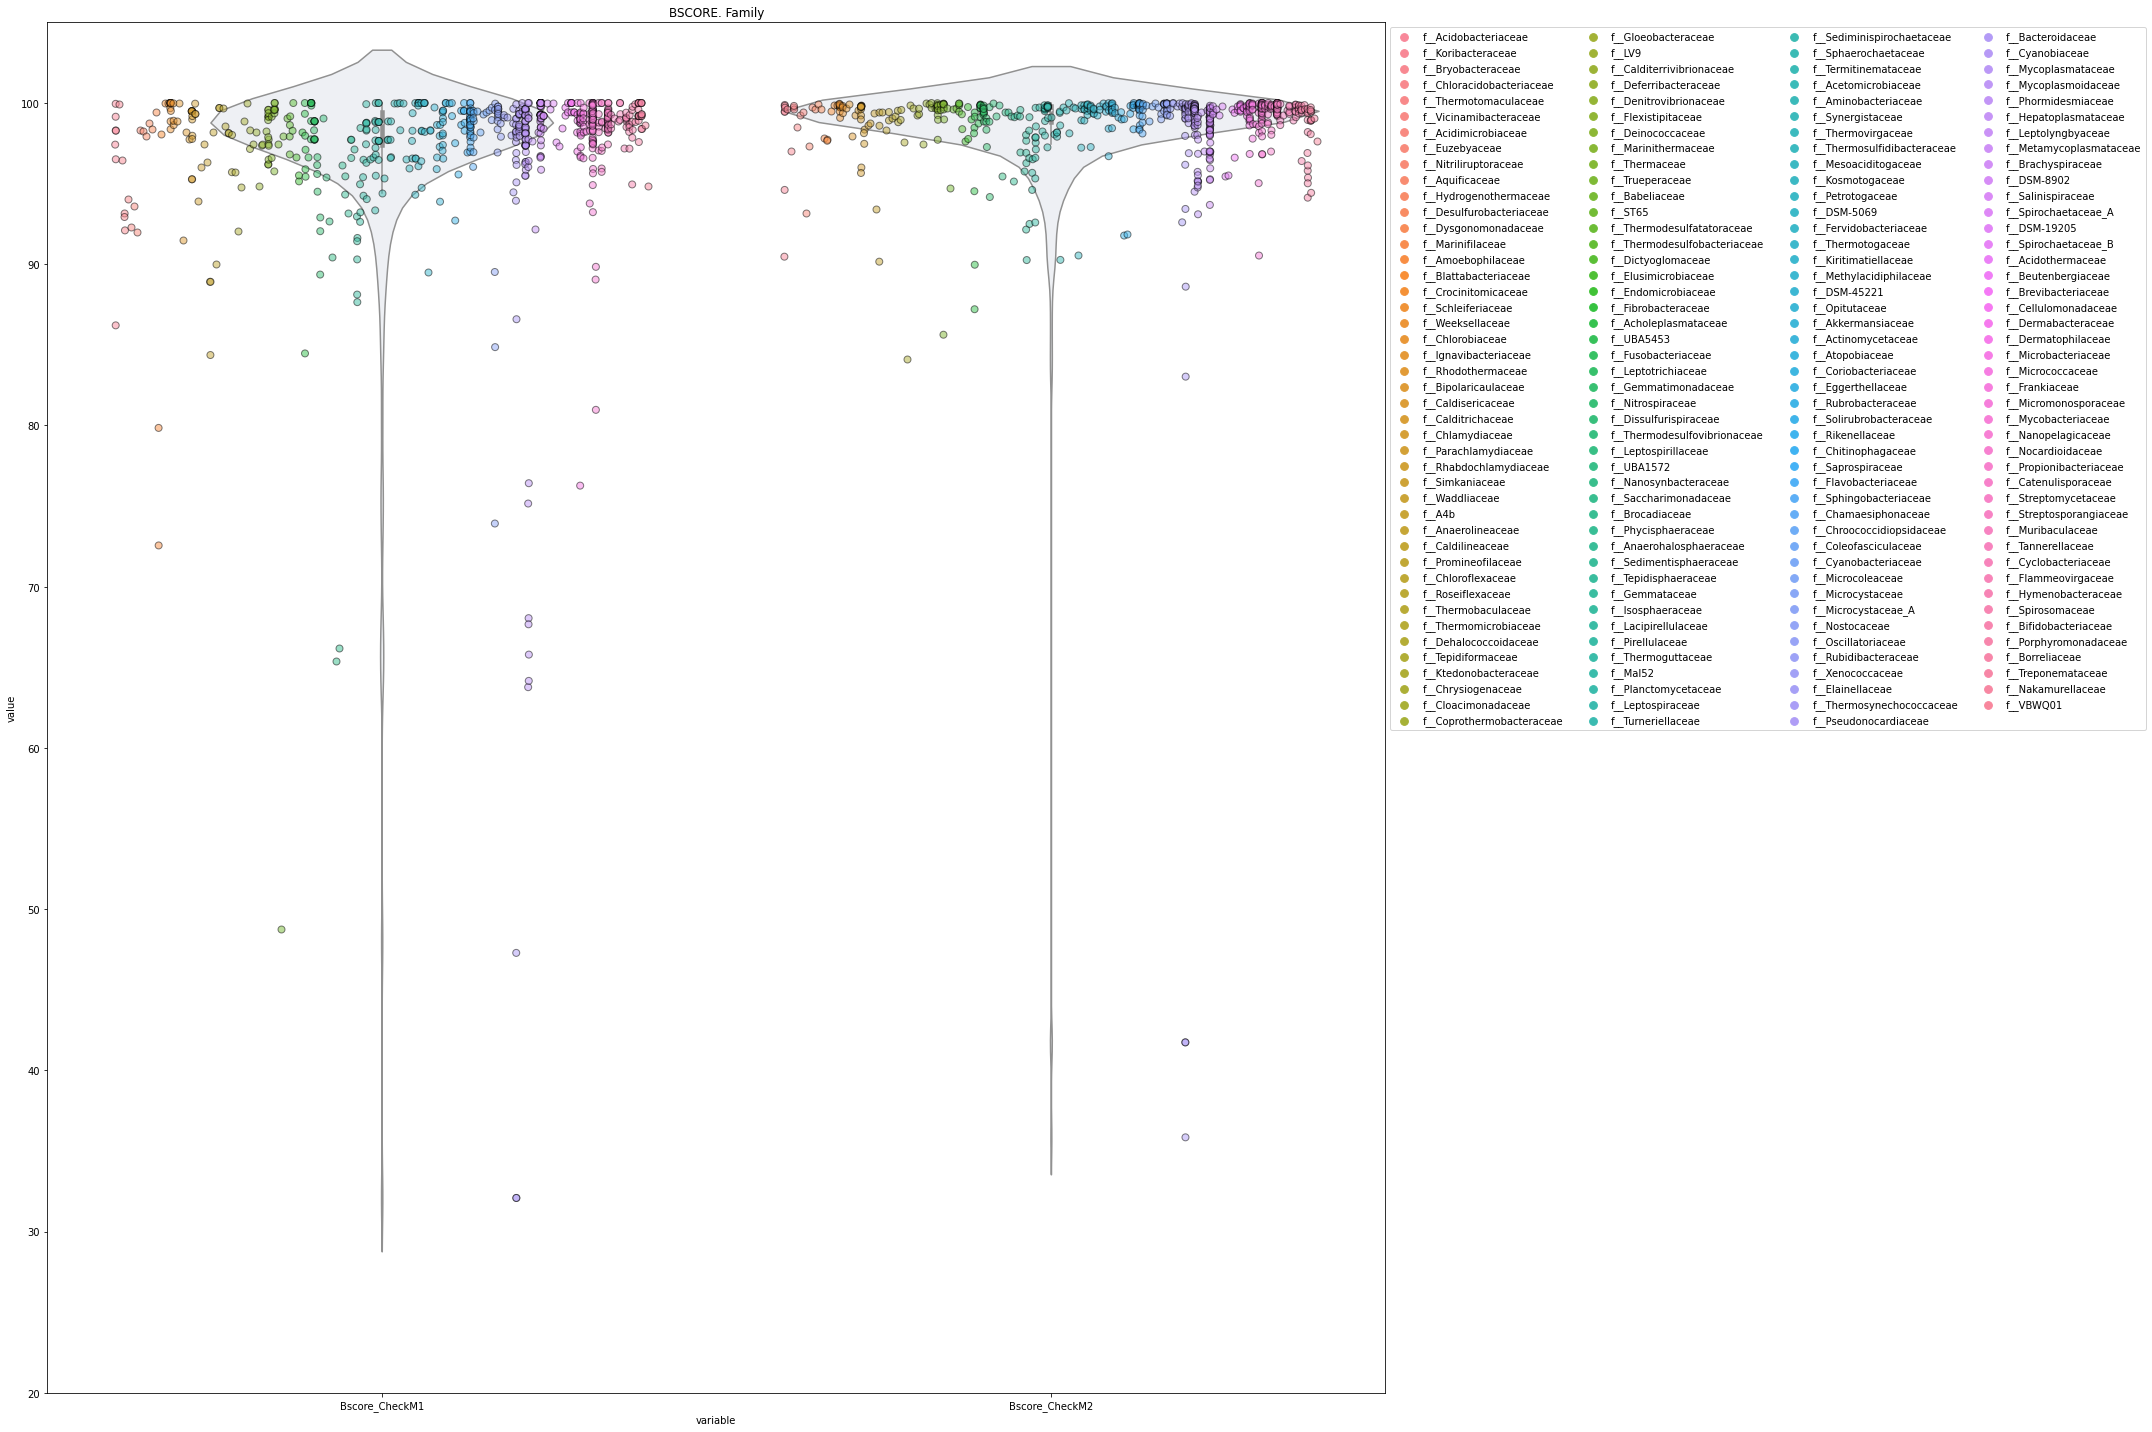

In [18]:
# Compare Bscore within real family of genomes
fig = plt.figure(figsize = (30, 20))

sns.violinplot(data=melt, y='value', x='variable', color='#edf0f5').set(title='BSCORE. Family')
sns.stripplot(data=melt, y='value', x='variable', alpha=0.5, s=7, edgecolor="black",
                linewidth=1, hue='family', dodge=True)
plt.ylim(20,105)
plt.legend(bbox_to_anchor=(1, 1), loc=2, ncol=4)
plt.tight_layout()

fig.savefig('CM-comp/4Bin_score_family.jpg', dpi=150)

In [29]:
## Aggregate Bscores by Phylum (mean, sd, count)

In [50]:
aggr = cmc.groupby('phylum') \
       .agg(count=('Bscore_CheckM2', 'size'), 
            mean_Bscore_CM1=('Bscore_CheckM1', 'mean'), mean_Bscore_CM2=('Bscore_CheckM2', 'mean'),
            sd_Bcore_CM1=('Bscore_CheckM1', 'std'), sd_Bcore_CM2=('Bscore_CheckM2', 'std'), 
            mean_Compl_CM1=('Completeness_CheckM1', 'mean'), mean_Compl_CM2=('Completeness_CheckM2', 'mean'),
            mean_Cont_CM1=('Contamination_CheckM1', 'mean'), mean_Cont_CM2=('Contamination_CheckM2', 'mean'))

aggr = aggr.sort_values('mean_Bscore_CM2')
aggr.to_excel('CM-comp/Aggr_phylum.xlsx')
aggr

,count,mean_Bscore_CM1,mean_Bscore_CM2,sd_Bcore_CM1,sd_Bcore_CM2,mean_Compl_CM1,mean_Compl_CM2,mean_Cont_CM1,mean_Cont_CM2
phylum,,,,,,,,,
Dependentiae,1,48.780000,94.740000,NaN,NaN,50.000000,95.740000,1.220000,1.000000
Omnitrophota,1,90.440000,95.450000,NaN,NaN,92.050000,95.480000,1.610000,0.030000
Chloroflexota,16,95.135000,97.163125,4.767228,4.318082,97.074375,99.011875,1.939375,1.848750
Planctomycetota,41,95.760244,97.421707,3.022898,2.375424,97.788293,98.875122,2.028049,1.453415
Bipolaricaulota,1,91.530000,97.980000,NaN,NaN,91.530000,98.020000,0.000000,0.040000
Firmicutes,112,96.473482,98.220000,7.551620,2.063747,97.235446,98.664196,0.761964,0.444196
Spirochaetota,47,98.655745,98.257021,1.298979,2.021366,99.103617,98.946383,0.447872,0.689362
Actinobacteriota,215,97.391953,98.309628,7.707033,7.236522,98.183349,99.040744,0.791395,0.731116
Acidobacteriota,14,95.483571,98.355714,3.888214,2.701230,98.126429,99.590000,2.642857,1.234286


<Figure size 720x720 with 0 Axes>

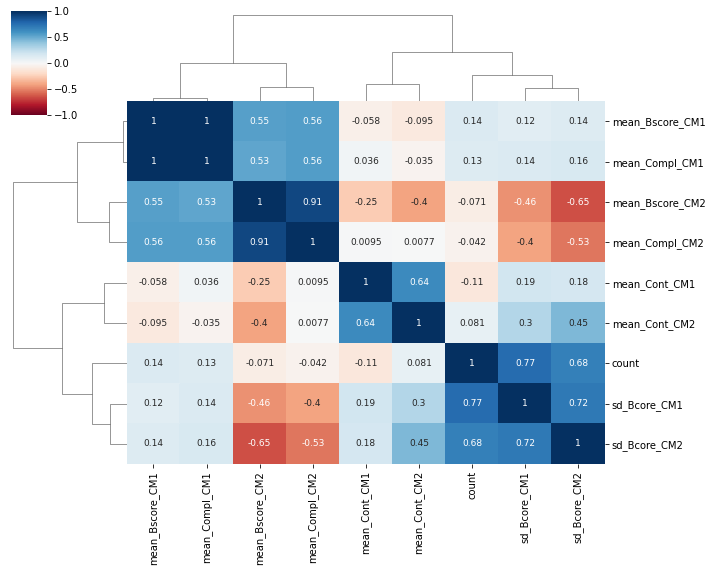

In [51]:
cor = aggr.corr()
plt.figure(figsize=(10, 10))
sns.clustermap(cor, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 9}, vmin=-1, vmax=1, figsize=(10,8))

plt.savefig('CM-comp/Corr.jpg', dpi=150)

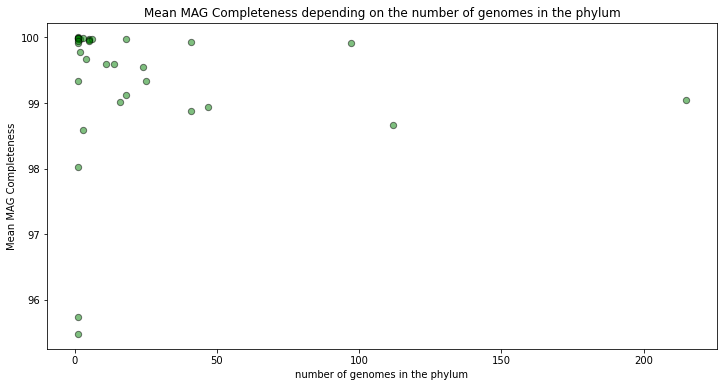

In [52]:
# Mean MAG Completeness depending on the number of genomes in the phylum
fig = plt.figure(figsize = (12, 6))
plt.scatter(data=aggr, x='count',y='mean_Compl_CM2', alpha=0.5, s=40, color='green', edgecolor="black",linewidth=1)
plt.title("Mean MAG Completeness depending on the number of genomes in the phylum")
plt.xlabel("number of genomes in the phylum")
plt.ylabel("Mean MAG Completeness")

plt.savefig('CM-comp/CM2_MeanCompl_SpCounts.jpg', dpi=150)

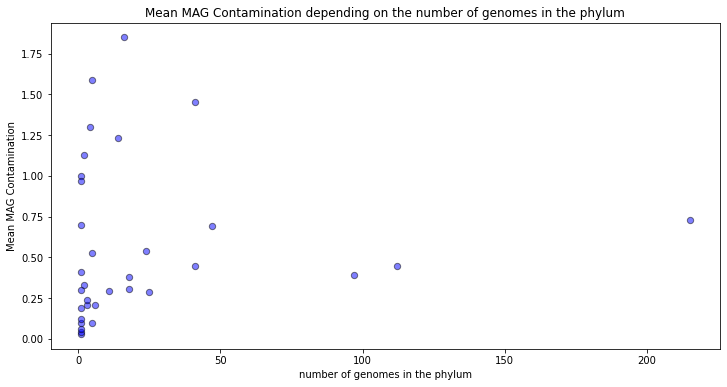

In [53]:
# Mean MAG Contamination depending on the number of genomes in the phylum
fig = plt.figure(figsize = (12, 6))
plt.scatter(data=aggr, x='count',y='mean_Cont_CM2', alpha=0.5, s=40, color='blue', edgecolor="black",linewidth=1)
plt.title("Mean MAG Contamination depending on the number of genomes in the phylum")
plt.xlabel("number of genomes in the phylum")
plt.ylabel("Mean MAG Contamination")

plt.savefig('CM-comp/CM2_MeanCont_SpCounts.jpg', dpi=150)

In [54]:
cmc.head(2)

,NCBI_accession,GTDB_tax,domain,phylum,class,order,family,genus,species,Completeness_CheckM2,Contamination_CheckM2,Algorithm_CheckM2,Table_CheckM2,Completeness_CheckM1,Contamination_CheckM1,Level,Marker_lineage_CheckM1,Level_CheckM1,Bscore_CheckM1,Bscore_CheckM2
0,GCF_003330725,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,d__Bacteria,Acidobacteriota,Acidobacteriae,Acidobacteriales,Acidobacteriaceae,Acidisarcina,s__Acidisarcina polymorpha,96.11,1.50,Gradient Boost (General Model),11,99.95,0.00,1_k,Bacteria,k,99.95,94.61
1,GCF_000022565,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,d__Bacteria,Acidobacteriota,Acidobacteriae,Acidobacteriales,Acidobacteriaceae,Acidobacterium,s__Acidobacterium capsulatum,99.99,0.51,Neural Network (Specific Model),11,100.00,0.85,1_k,Bacteria,k,99.15,99.48


In [55]:
cmc['ComplDiff'] = cmc['Completeness_CheckM2']-cmc['Completeness_CheckM1']
cmc['ContDiff'] = cmc['Contamination_CheckM2']-cmc['Contamination_CheckM1']

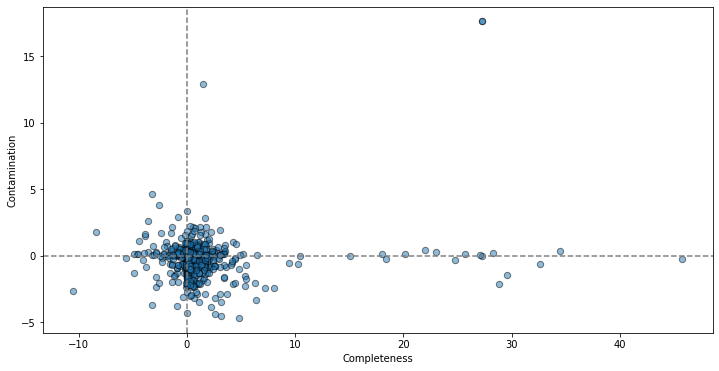

In [63]:
fig = plt.figure(figsize = (12, 6))
plt.scatter(data=cmc, x='ComplDiff',y='ContDiff', alpha=0.5, s=40, edgecolor="black",linewidth=1)
#plt.title("Mean MAG Completeness depending on the number of genomes in the phylum")
plt.xlabel("Completeness")
plt.ylabel("Contamination")

plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')

plt.savefig('CM-comp/Fill.jpg', dpi=150)

In [78]:
#quast

In [68]:
len(cmc[(cmc['ComplDiff'] >= 0)&(cmc['ContDiff'] <= 0)])


307

In [69]:
len(cmc)

725

In [70]:
307/725

0.42344827586206896